# End-to-End Exploratory Data Analysis (EDA) on the Titanic Dataset

**Project Objective:** To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic. This notebook will serve as a complete guide, covering data loading, cleaning, analysis, feature engineering, and visualization, with theoretical explanations at each stage.

---


### **Theoretical Concept: What is Exploratory Data Analysis (EDA)?**

Exploratory Data Analysis is the crucial process of performing initial investigations on data to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations. It is not about formal modeling or hypothesis testing; rather, it is about getting to know your data before you start building models.

**Why is it important?**
1.  **Understand the Data:** It helps you understand the variables and their relationships.
2.  **Data Cleaning:** It reveals missing values, outliers, and other inconsistencies that need to be handled.
3.  **Feature Selection:** It helps identify which variables are the most important for your problem (feature engineering and selection).
4.  **Assumption Checking:** It allows you to check assumptions that are required for certain machine learning models (e.g., normality, linearity).

### Libraries Used: Pandas and Seaborn

- **Pandas:** This is a powerful Python library for data manipulation and analysis. It provides data structures like DataFrames, which are essential for working with tabular data. We used Pandas to load the dataset, handle missing values, and perform various data transformations.

- **Seaborn:** Built on top of Matplotlib, Seaborn is a statistical data visualization library. It provides a high-level interface for drawing attractive and informative statistical graphics. We used Seaborn to create various plots like countplots, histograms, boxplots, and barplots to visualize the distributions and relationships within the data.

### Step 1: Setup - Importing Libraries

We'll start by importing the essential Python libraries for data manipulation (`pandas`, `numpy`) and visualization (`matplotlib`, `seaborn`).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### Step 2: Data Loading and Initial Inspection

We'll load the dataset and take our first look at its structure, content, and overall health.

In [ ]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'
# Since this is a terminal command so we have to use ! mark to load the dataset


Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.45 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
#Loading the dataset
titanic_df=pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')

#printing first and last 5 rows
titanic_df.head()
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Printing shape
titanic_df.shape

(891, 12)

In [ ]:
# Info about the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Describing the dataset statistics
print("Statistics of Data")
titanic_df.describe()

Statistics of Data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Interpretation of `.describe()`:**
- **Survived:** About 38.4% of passengers in this dataset survived.
- **Age:** The age ranges from ~5 months to 80 years, with an average age of about 30.
- **Fare:** The fare is highly skewed, with a mean of $32 but a median of only $14.45. The maximum fare is over $512, indicating the presence of extreme outliers.

### Step 3: Data Cleaning

Before analysis, we must handle the missing values we identified.

#### **Theoretical Concept: Missing Value Imputation**

Imputation is the process of replacing missing data with substituted values. The strategy depends on the data type and its distribution:
- **Numerical Data:** For skewed distributions (like `Age` and `Fare`), using the **median** is more robust than the mean because it is not affected by outliers.
- **Categorical Data:** A common strategy is to fill with the **mode** (the most frequent value).
- **High Cardinality/Too Many Missing Values:** For columns like `Cabin`, where most data is missing, imputing might not be effective. We could either drop the column or engineer a new feature from it (e.g., `Has_Cabin`).

---



In [ ]:
# Checking the null values
print("Missing values")
titanic_df.isnull().sum()

Missing values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# 1.Handling missing data in "Age" column by replacing them with median value.
#because the age distribution can be skewed.
median_age=titanic_df['Age'].median()
titanic_df['Age']=titanic_df['Age'].fillna(median_age)

print("Missing values after filling Age column")
titanic_df[['Age', 'Cabin', 'Embarked']].isna().sum()

Missing values after filling Age column


,0
Age,0
Cabin,687
Embarked,2


In [ ]:
mode_embarked=titanic_df['Embarked'].mode()[0]
print(mode_embarked)

S


In [ ]:
#2. Handling missing values in 'Embarked' by repacing them with mode values since only 2 missing values.
mode_embarked=titanic_df['Embarked'].mode()[0]
titanic_df['Embarked']=titanic_df['Embarked'].fillna(mode_embarked)

print("Missing valus after filling Embarked column")
titanic_df[['Age', 'Embarked', 'Cabin']].isna().sum()

Missing valus after filling Embarked column


,0
Age,0
Embarked,0
Cabin,687


In [ ]:
#3. Handling missing valuesin Cabn column
# Since there are a lot of missing values we'll create a new column as "Has_column" and fill1 if the value exist and 0 if not.
titanic_df['Has_cabin']=titanic_df['Cabin'].notnull().astype(int)
titanic_df.drop('Cabin', inplace=True, axis=1)

In [ ]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Step 4: Univariate Analysis

We analyze each variable individually to understand its distribution.

#### **Theoretical Concept: Univariate Analysis**

This is the simplest form of data analysis, where the data being analyzed contains only one variable. The main purpose is to describe the data and find patterns within it.
- **For Categorical Variables:** We use frequency tables, bar charts (`countplot`), or pie charts to see the count or proportion of each category.
- **For Numerical Variables:** We use histograms (`histplot`) or kernel density plots (`kdeplot`) to understand the distribution, and box plots (`boxplot`) to identify the central tendency, spread, and outliers.

Analyzing Categorical features.


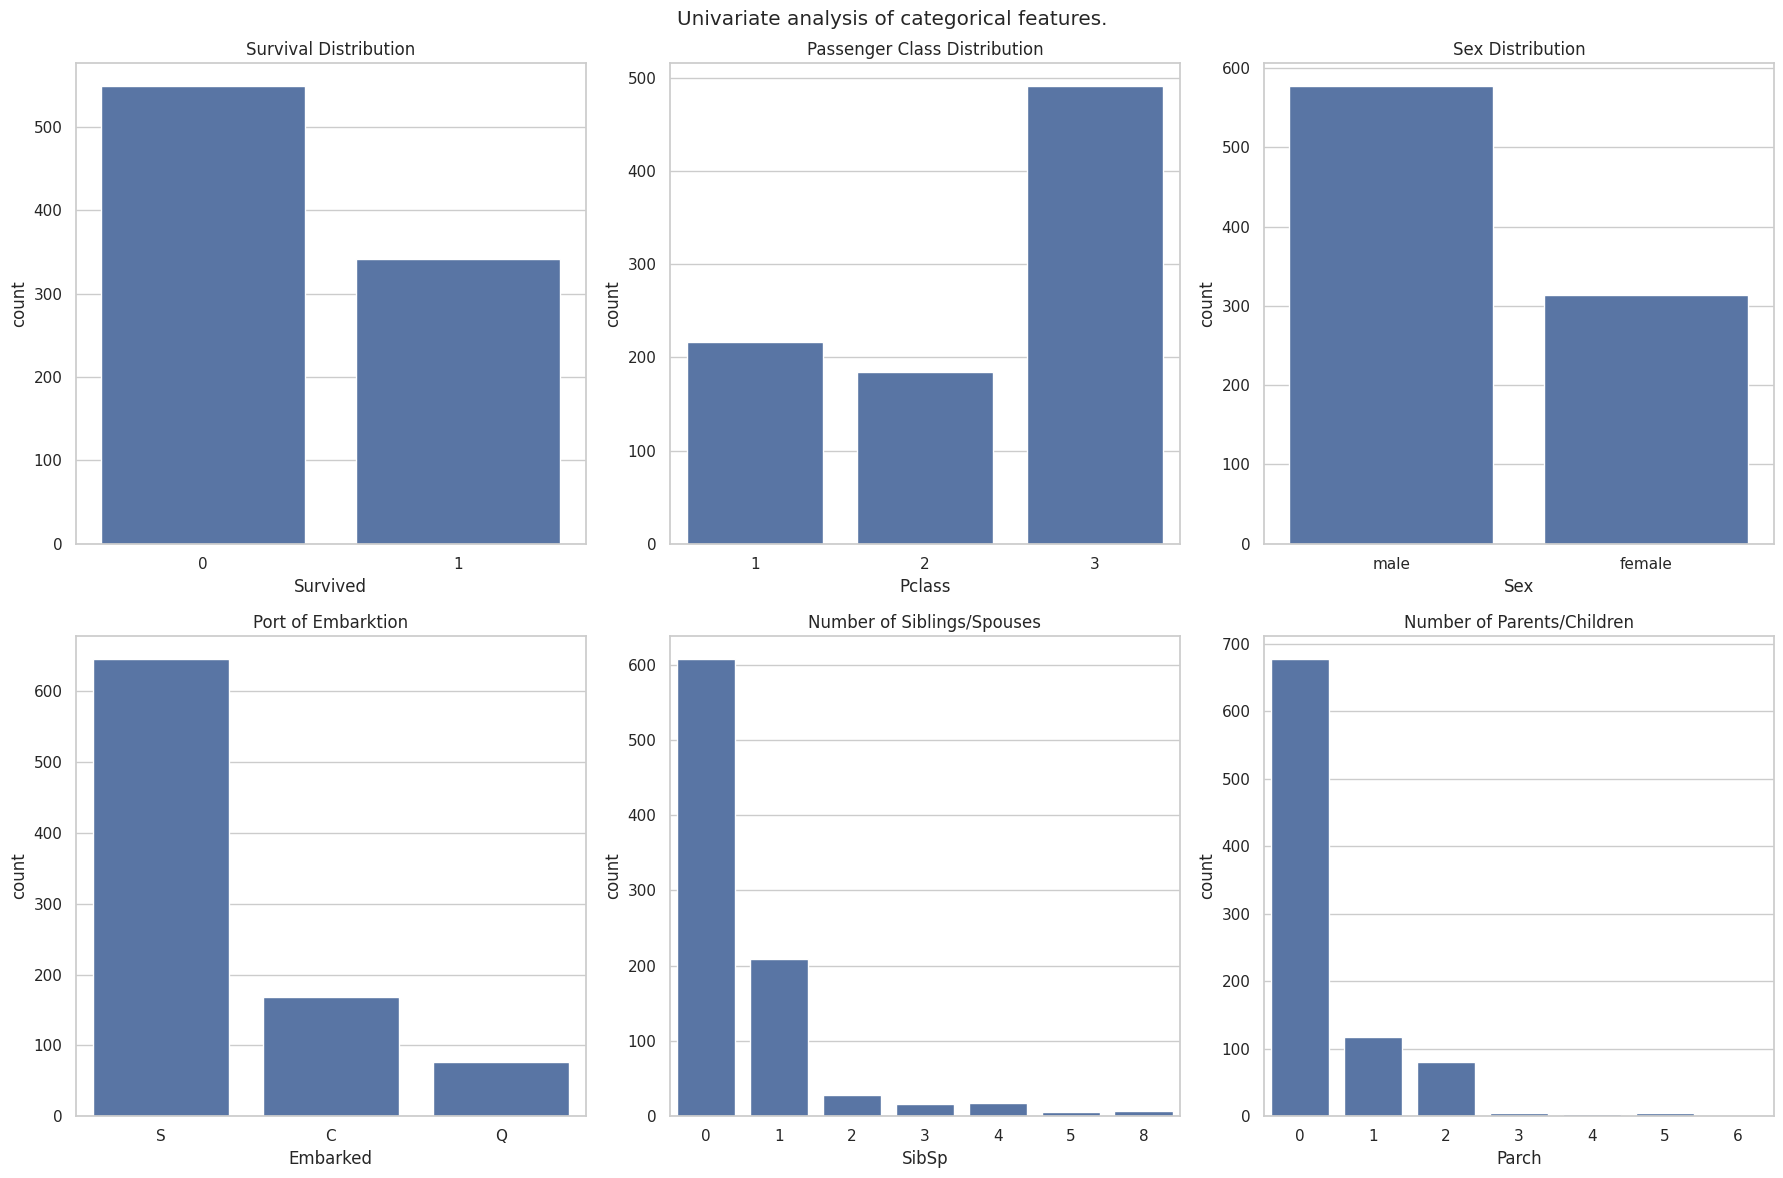

In [ ]:
print("Analyzing Categorical features.")

fig,axes=plt.subplots(2,3, figsize=(18,12))
fig.suptitle("Univariate analysis of categorical features.")

sns.countplot(ax=axes[0,0], data=titanic_df, x='Survived').set_title("Survival Distribution")
sns.countplot(ax=axes[0,1], data=titanic_df, x='Pclass').set_title("Passenger Class Distribution")
sns.countplot(ax=axes[0,2], data=titanic_df, x='Sex').set_title("Sex Distribution")
sns.countplot(ax=axes[1,0], data=titanic_df, x='Embarked').set_title("Port of Embarktion")
sns.countplot(ax=axes[1,1], data=titanic_df, x='SibSp').set_title("Number of Siblings/Spouses")
sns.countplot(ax=axes[1,2], data=titanic_df, x='Parch').set_title("Number of Parents/Children")

plt.tight_layout()
plt.show()

**Key Insights (Categorical):**
- **Survival:** Most passengers (over 500) did not survive.
- **Pclass:** The 3rd class was the most populated, followed by 1st and then 2nd.
- **Sex:** There were significantly more males than females.
- **Embarked:** The vast majority of passengers embarked from Southampton ('S').
- **SibSp & Parch:** Most passengers traveled alone.

Analyzing numerical features.


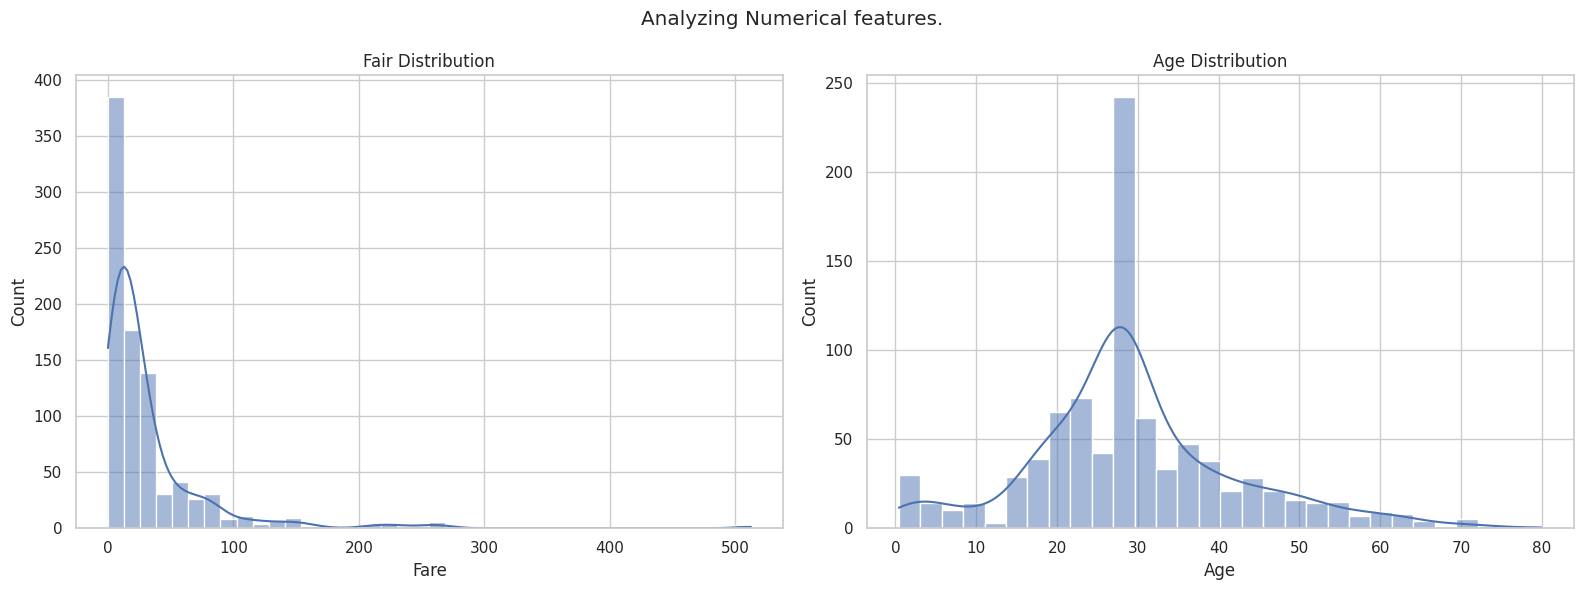

In [ ]:
print("Analyzing numerical features.")
fig, axes=plt.subplots(1, 2, figsize=(16,6))
fig.suptitle("Analyzing Numerical features.")

sns.histplot(ax=axes[0], x='Fare', data=titanic_df, kde=True, bins=40).set_title("Fair Distribution")
sns.histplot(ax=axes[1], x='Age', data=titanic_df, kde=True, bins=30).set_title("Age Distribution")

plt.tight_layout()
plt.show()

**Key Insights (Numerical):**
- **Age:** The distribution peaks around the 20-30 age range. Remember we filled missing values with the median (28), which contributes to the height of that central bar.
- **Fare:** The distribution is heavily right-skewed, confirming that most tickets were cheap, with a few very expensive exceptions.

### Step 5: Bivariate Analysis

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates to our target variable, `Survived`.

#### **Theoretical Concept: Bivariate Analysis**
This type of analysis involves two different variables, and its main purpose is to find relationships between them.
- **Categorical vs. Numerical:** To compare a numerical variable across different categories, we often use bar plots (`barplot`) that show the mean (or another estimator) of the numerical variable for each category. We can also use box plots or violin plots.
- **Categorical vs. Categorical:** We can use stacked bar charts or contingency tables (crosstabs).
- **Numerical vs. Numerical:** A scatter plot is the standard choice, with a correlation matrix being used to quantify the relationship.

Bivariate analysis with feautre Survival


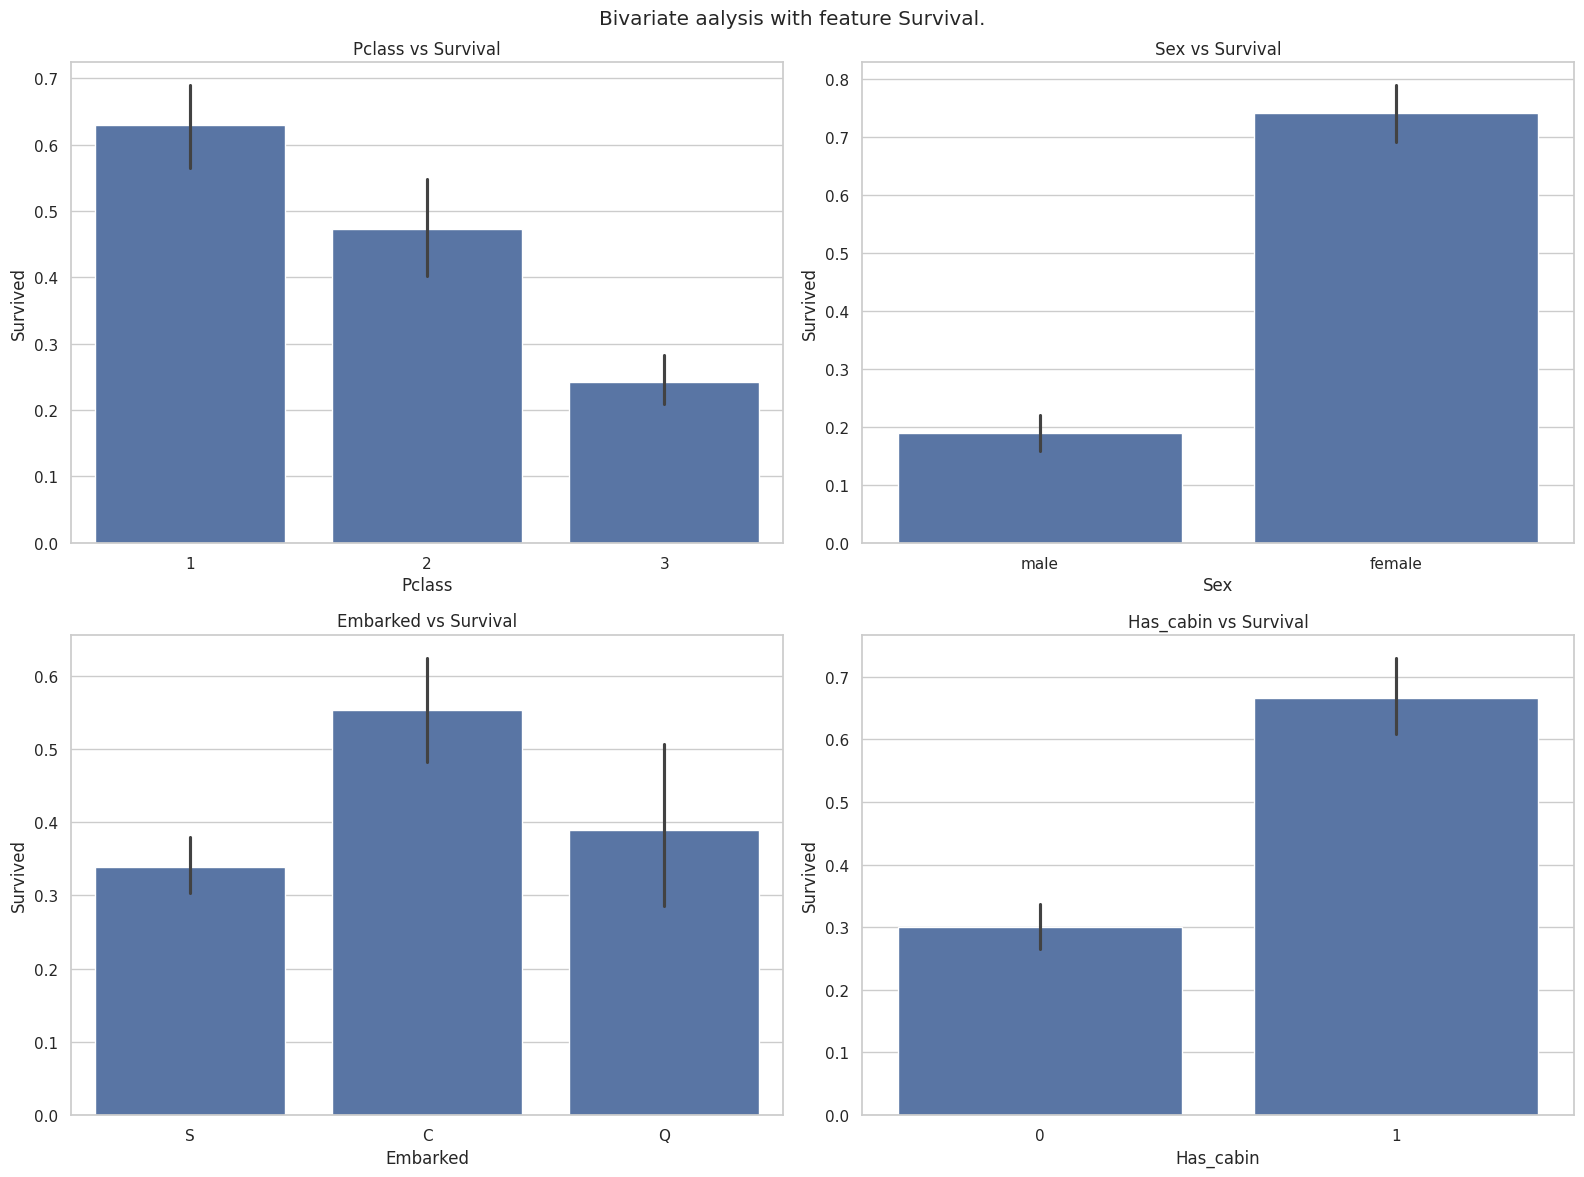

In [ ]:
print("Bivariate analysis with feautre Survival")
fig, axes=plt.subplots(2,2, figsize=(16,12))
fig.suptitle("Bivariate aalysis with feature Survival.")

#pclass vs survival
sns.barplot(ax=axes[0,0], data=titanic_df, x='Pclass', y='Survived').set_title("Pclass vs Survival")

#sex vs survival
sns.barplot(ax=axes[0,1], data=titanic_df, x='Sex', y='Survived').set_title("Sex vs Survival")

#Embarked vs survival
sns.barplot(ax=axes[1,0], data=titanic_df, x='Embarked', y='Survived').set_title("Embarked vs Survival")

#Has_cabin vs survival
sns.barplot(ax=axes[1,1], data=titanic_df, x='Has_cabin', y='Survived').set_title("Has_cabin vs Survival")

plt.tight_layout()
plt.show()

**Key Insights (Bivariate):**
- **Pclass:** A clear trend emerges: 1st class passengers had a >60% survival rate, while 3rd class passengers had less than 25%.
- **Sex:** This is the strongest predictor. Females had a survival rate of ~75%, while males had a rate below 20%.
- **Embarked:** Passengers embarking from Cherbourg ('C') had a higher survival rate than those from the other ports.
- **Has_Cabin:** Passengers with a registered cabin number had a much higher survival rate. This is likely correlated with being in 1st class.

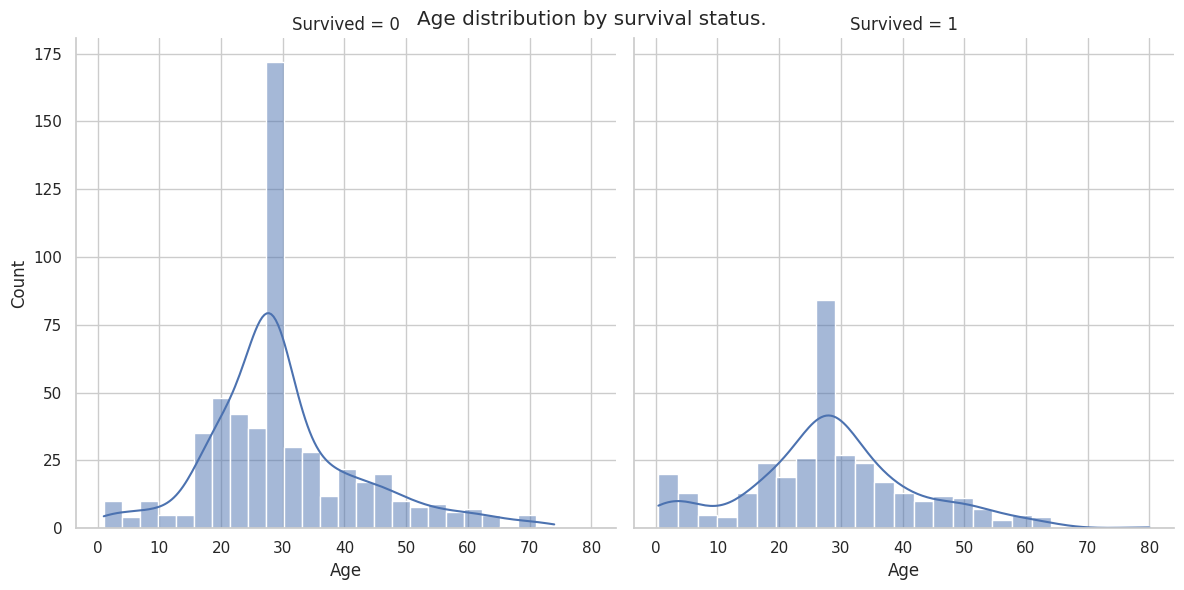

In [ ]:
# Age vs Survival
g=sns.FacetGrid(titanic_df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle("Age distribution by survival status.")
plt.show()


**Key Insight (Age vs. Survival):**
- Infants and young children had a higher probability of survival.
- A large portion of non-survivors were young adults (20-40).
- The oldest passengers (80 years) did not survive.

\### Deeper Dive: Outlier Analysis for 'Fare'
The `.describe()` function and histogram showed that `Fare` has extreme outliers. Let's visualize this clearly with a box plot.

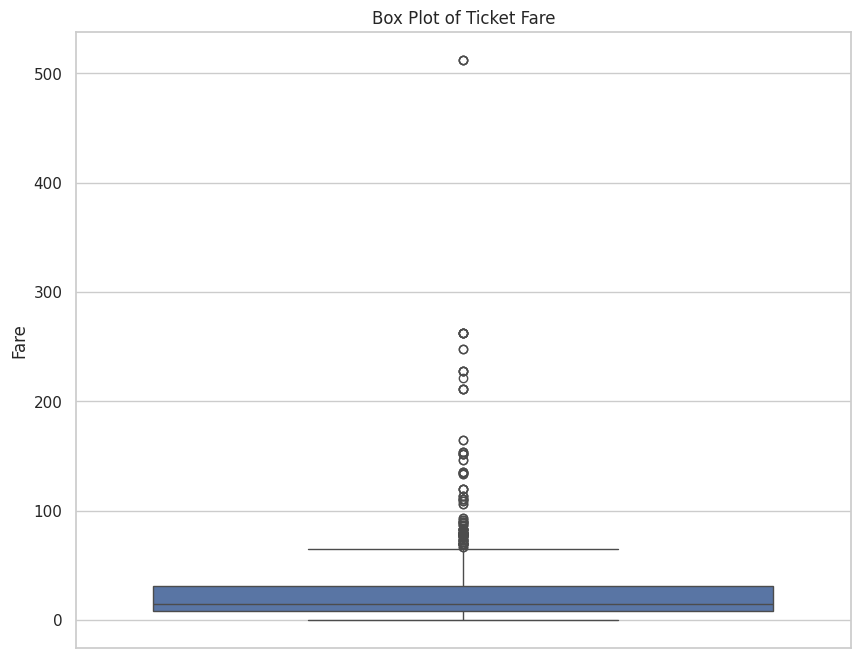

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=titanic_df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

**Observation:**
The box plot confirms the presence of significant outliers. Most fares are concentrated below \$100, but there are several fares extending far beyond, with some even exceeding \$500. These are likely first-class passengers who booked luxurious suites. For some machine learning models, handling these outliers (e.g., through log transformation) would be an important step.

### Step 6: Feature Engineering
Now, we'll create new features from the existing ones to potentially uncover deeper insights and provide more useful information for a machine learning model.

#### **Theoretical Concept: Feature Engineering**
Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data. A good feature should be relevant to the problem and easy for a model to understand.

**Common Techniques:**
1.  **Combining Features:** Creating a new feature by combining others (e.g., `SibSp` + `Parch` = `FamilySize`).
2.  **Extracting from Text:** Pulling out specific information from a text feature (e.g., extracting titles from the `Name` column).
3.  **Binning:** Converting a continuous numerical feature into a categorical one (e.g., binning `Age` into groups like 'Child', 'Adult', 'Senior').

In [ ]:
# 1. Create a 'FamilySize' feature
titanic_df["FamilySize"]=titanic_df["SibSp"] + titanic_df["Parch"] + 1 # +1 for the person himself.

# 2. Create an 'IsAlone' feature
titanic_df["IsAlone"]=0
titanic_df.loc[titanic_df["FamilySize"]==1, 'IsAlone']=1

print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


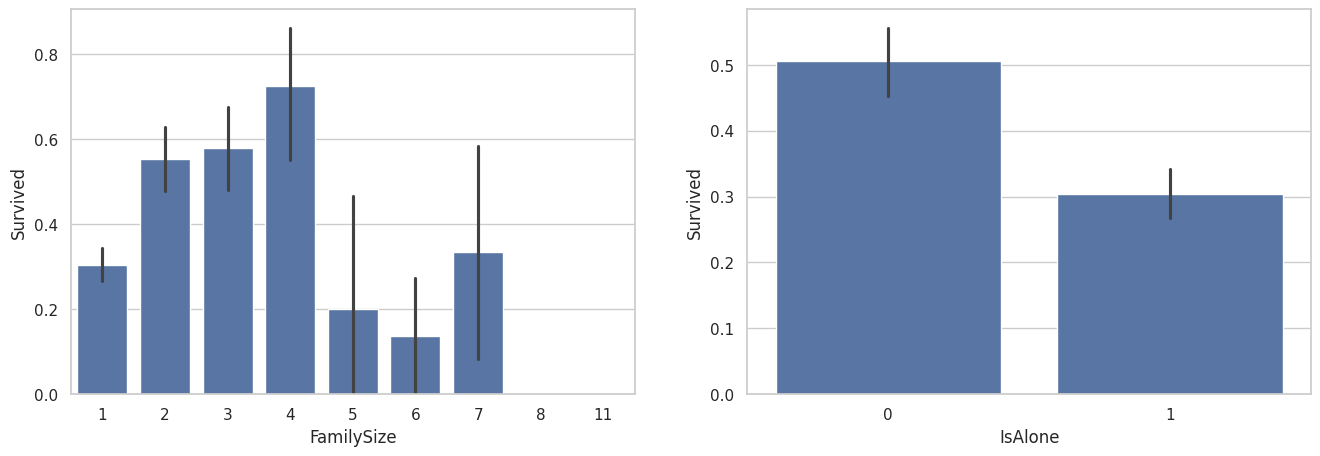

In [ ]:
# Analyze the new family-related features against survival
fig, axes=plt.subplots(1,2, figsize=(16,5))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=titanic_df)

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=titanic_df)

plt.show()

**Insight:**
- Passengers who were alone (`IsAlone=1`) had a lower survival rate (~30%) than those in small families.
- Small families of 2 to 4 members had the highest survival rates.
- Very large families (5 or more) had a very poor survival rate. This might be because it was harder for large families to stay together and evacuate.

* Matches a space.
* Titles in the names are usually preceded by a space.
([A-Za-z]+): This is the capturing group.
* [A-Za-z]+: Matches one or more uppercase or lowercase letters. This captures the title itself (like Mr, Mrs, Miss, etc.).
* \.: Matches a literal dot (.) which usually follows the title.

In [ ]:
# 3. Extract 'Title' from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


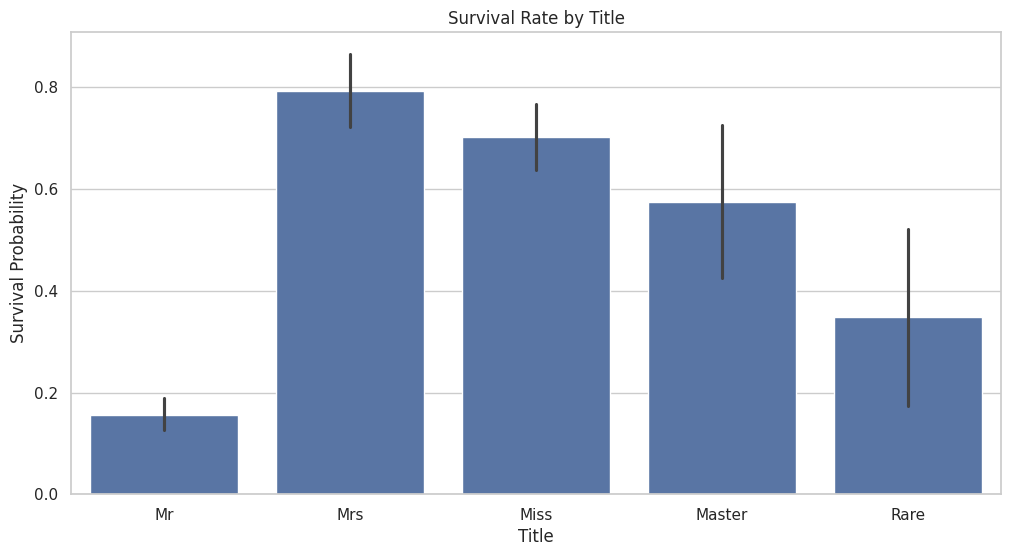

In [ ]:
# Simplify the titles by grouping rare ones into a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

**Insight:**
The `Title` feature gives us powerful information. 'Mrs' and 'Miss' (females) had high survival rates. 'Mr' (males) had a very low survival rate. 'Master' (young boys) had a significantly higher survival rate than 'Mr', reinforcing the 'children first' idea. The 'Rare' titles, often associated with nobility or status, also had a mixed but generally higher survival rate than common men.

### Step 7: Multivariate Analysis

Now we explore interactions between multiple variables simultaneously, including our new engineered features.

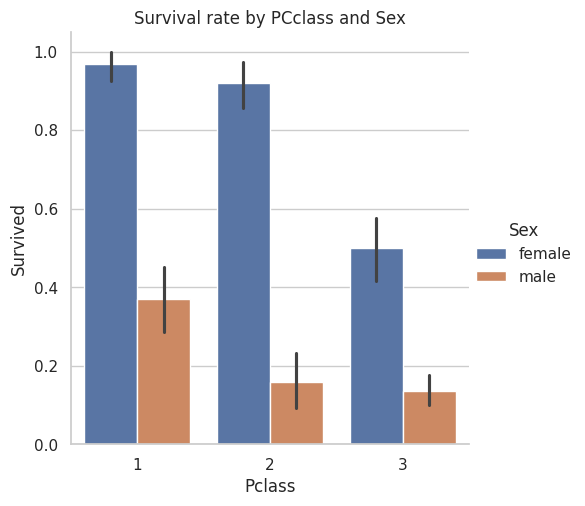

In [ ]:
# Survival rate by PCclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=titanic_df)
plt.title("Survival rate by PCclass and Sex")
plt.show()
# Insights: Females in all classes had a significantly higher survival rate than males.

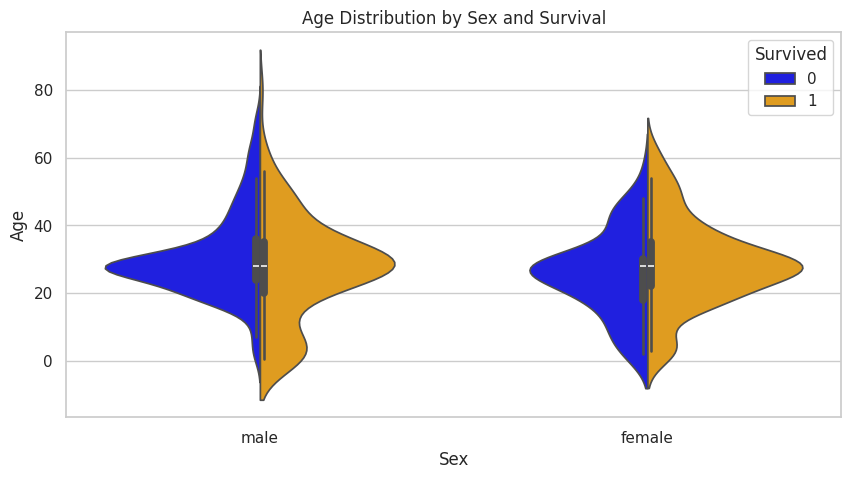

In [ ]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(10, 5))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

**Insight from Violin Plot:**
- For males, the peak of the distribution for survivors (orange) is at a very young age (children), while the peak for non-survivors is in the 20-30 range.
- For females, the distribution of survivors is much broader, indicating that females of most ages had a good chance of surviving.

### Step 8: Correlation Analysis

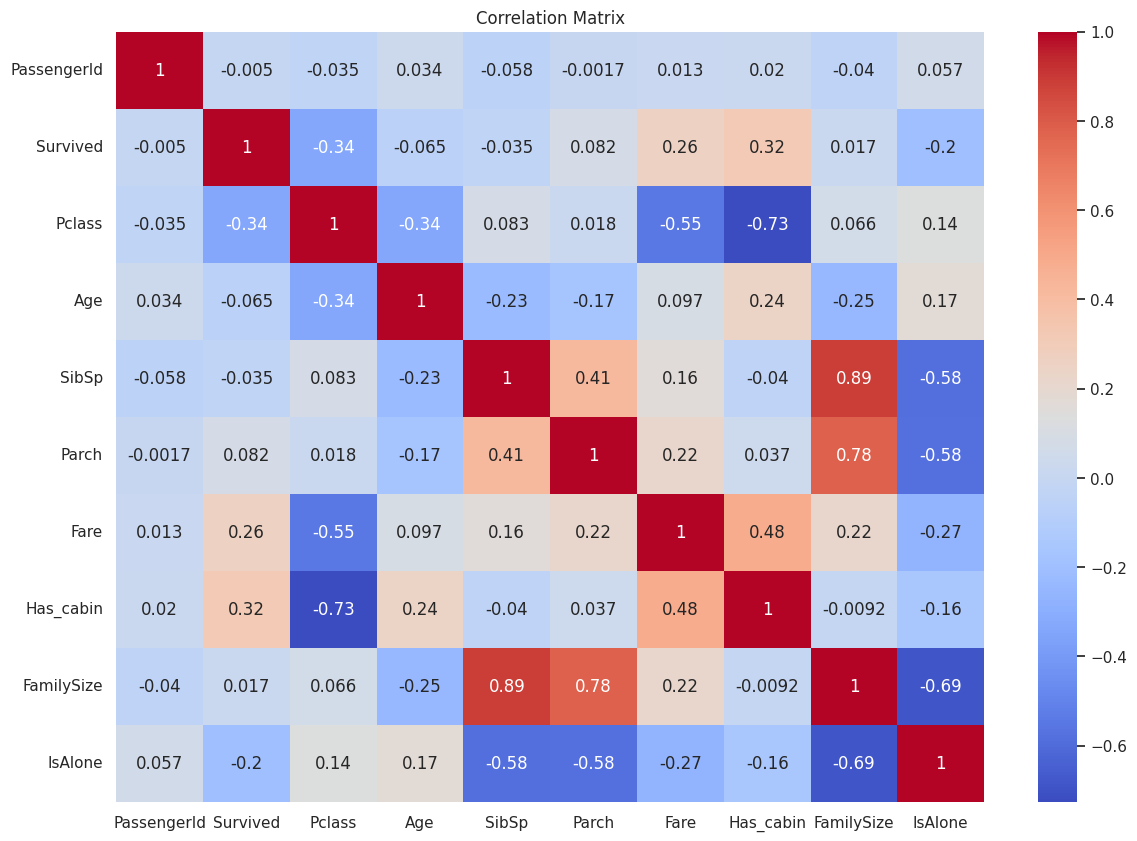

In [ ]:
plt.figure(figsize=(14, 10))
numeric_cols=titanic_df.select_dtypes(include=np.number)
correlation_matrix=numeric_cols.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.